In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
data = pd.read_csv('d:/datasets/Tweets.csv')

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data = data[['airline_sentiment', 'text']]

In [6]:
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [7]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
data_p = data[data.airline_sentiment == 'positive']

In [9]:
data_n = data[data.airline_sentiment == 'negative']

In [10]:
data_n = data_n.iloc[:len(data_p)]

In [11]:
len(data_n), len(data_p)

(2363, 2363)

In [12]:
data = pd.concat([data_n, data_p])

In [13]:
data = data.sample(len(data))

In [14]:
data['review'] = (data.airline_sentiment == 'positive').astype('int')

In [15]:
del data['airline_sentiment']

tf.keras.layers.Embedding  把文本向量化

In [16]:
import re

In [17]:
token = re.compile('[A-Za-z]+|[!?,.()]')

In [18]:
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text

In [19]:
data['text'] = data.text.apply(reg_text)

In [20]:
word_set = set()
for text in data.text:
    for word in text:
        word_set.add(word) 

In [21]:
max_word = len(word_set) + 1
max_word

7101

In [22]:
word_list = list(word_set)

In [23]:
word_list.index('spending')

2436

In [24]:
word_index =  dict((word, word_list.index(word) + 1) for word in word_list)

In [25]:
word_index

{'safer': 1,
 'razor': 2,
 'happycamper': 3,
 'nfl': 4,
 'mechanical': 5,
 'pointy': 6,
 'bnflhpxtmw': 7,
 'contact': 8,
 'loc': 9,
 'whoot': 10,
 'contract': 11,
 'welcome': 12,
 'boy': 13,
 'operate': 14,
 'chicken': 15,
 'blueheros': 16,
 'powers': 17,
 'ucvnilmb': 18,
 'browser': 19,
 'grandcanyon': 20,
 'with': 21,
 'mint': 22,
 'ralph': 23,
 'specially': 24,
 'voucherwhatajoke': 25,
 'secured': 26,
 'makeup': 27,
 'marketing': 28,
 'absolute': 29,
 'atc': 30,
 'tired': 31,
 'boston': 32,
 'und': 33,
 'session': 34,
 'damionflight': 35,
 'buffalo': 36,
 'ccicanine': 37,
 'include': 38,
 'misfortune': 39,
 'literally': 40,
 'adams': 41,
 'experiencing': 42,
 'neveind': 43,
 'versions': 44,
 'air': 45,
 'unacceptable': 46,
 'dandy': 47,
 'flyingainteasy': 48,
 'delete': 49,
 'flyquiet': 50,
 'usa': 51,
 'coupons': 52,
 'batman': 53,
 'im': 54,
 'during': 55,
 'oz': 56,
 'total': 57,
 'freaked': 58,
 'ted': 59,
 'blatant': 60,
 'ill': 61,
 'forward': 62,
 'playlist': 63,
 'canadian':

In [26]:
data_ok = data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [27]:
len(data_ok.iloc[2])

16

In [28]:
maxlen = max(len(x) for x in data_ok)

In [29]:
maxlen

40

In [30]:
data_ok = keras.preprocessing.sequence.pad_sequences(data_ok.values, maxlen=maxlen)

In [31]:
data_ok.shape

(4726, 40)

In [32]:
data.review.values

array([0, 1, 1, ..., 1, 1, 0])

In [33]:
model = keras.Sequential()

Embeding : 把文本映射为一个密集向量

In [34]:
model.add(layers.Embedding(max_word, 50, input_length=maxlen))

In [35]:
model.add(layers.LSTM(64))

In [36]:
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 50)            355050    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 384,555
Trainable params: 384,555
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [39]:
history = model.fit(data_ok, data.review.values, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 3s 15ms/step - loss: 0.6529 - acc: 0.5971 - val_loss: 0.5793 - val_acc: 0.6934
Epoch 2/10
30/30 [==============================] - 0s 6ms/step - loss: 0.4331 - acc: 0.8053 - val_loss: 0.2750 - val_acc: 0.8837
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.1731 - acc: 0.9426 - val_loss: 0.1800 - val_acc: 0.9387
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 0.0992 - acc: 0.9664 - val_loss: 0.1809 - val_acc: 0.9397
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 0.0579 - acc: 0.9852 - val_loss: 0.2208 - val_acc: 0.9292
Epoch 6/10
30/30 [==============================] - 0s 7ms/step - loss: 0.0410 - acc: 0.9886 - val_loss: 0.2100 - val_acc: 0.9366
Epoch 7/10
30/30 [==============================] - 0s 7ms/step - loss: 0.0321 - acc: 0.9913 - val_loss: 0.2333 - val_acc: 0.9376
Epoch 8/10
30/30 [==============================] - 0s 7ms/step - loss: 0.0246 - acc: 0.9

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

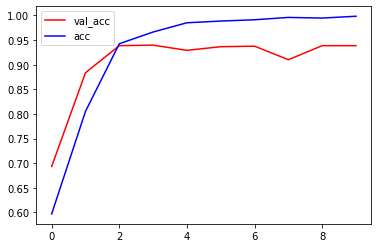

In [41]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

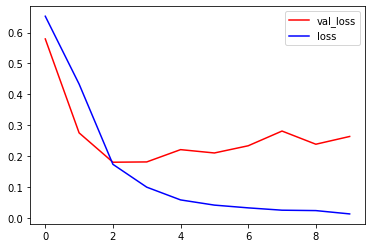

In [42]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()

使用循环 dropout 抑制过拟合

对每一个时间步使用相同的 dropout 掩码

In [56]:
def train_model():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.LSTM(64,
                         dropout=0.2,
                         recurrent_dropout=0.5))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

In [57]:
model2 = train_model()

In [45]:
history = model2.fit(data_ok, data.review.values, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 8s 207ms/step - loss: 0.6560 - acc: 0.6444 - val_loss: 0.6045 - val_acc: 0.7146
Epoch 2/10
30/30 [==============================] - 6s 201ms/step - loss: 0.5547 - acc: 0.7378 - val_loss: 0.4721 - val_acc: 0.7875
Epoch 3/10
30/30 [==============================] - 6s 201ms/step - loss: 0.3941 - acc: 0.8360 - val_loss: 0.3505 - val_acc: 0.8319
Epoch 4/10
30/30 [==============================] - 6s 202ms/step - loss: 0.2629 - acc: 0.9000 - val_loss: 0.2492 - val_acc: 0.8869
Epoch 5/10
30/30 [==============================] - 6s 201ms/step - loss: 0.1924 - acc: 0.9360 - val_loss: 0.1980 - val_acc: 0.9271
Epoch 6/10
30/30 [==============================] - 6s 201ms/step - loss: 0.1548 - acc: 0.9466 - val_loss: 0.1882 - val_acc: 0.9323
Epoch 7/10
30/30 [==============================] - 6s 201ms/step - loss: 0.1343 - acc: 0.9582 - val_loss: 0.2106 - val_acc: 0.9186
Epoch 8/10
30/30 [==============================] - 6s 201ms/step - loss: 0.

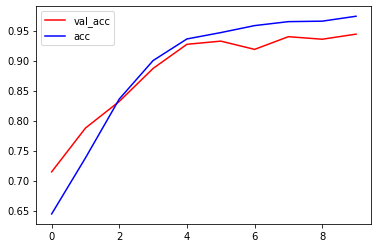

In [46]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

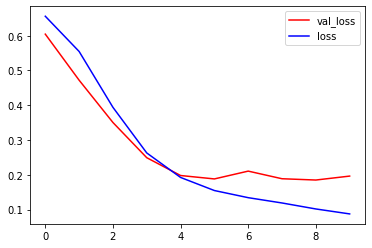

In [47]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()

# 使用双向 RNN

In [50]:
def train_model():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.Bidirectional(layers.LSTM(64,
                         dropout=0.2,
                         recurrent_dropout=0.5)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

In [51]:
model3 = train_model()

In [ ]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.00001)

In [ ]:
history = model3.fit(data_ok, 
                     data.review.values, 
                     epochs=30, 
                     batch_size=128, 
                     validation_split=0.2,
                     callbacks=[learning_rate_reduction])

In [ ]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

In [ ]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()